In [1]:
import math
import cnn
import matplotlib.pyplot as plt
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# constants
LEARNING_RATE = 1e-4
BATCH_SIZE = 32
EPOCH_NUM = 1 #원래 1000

# model & data loader
model = cnn.Model()
loader = cnn.DataLoader()
x, y = loader.get_batch()
model.set_learning_rate(LEARNING_RATE)
loader.set_batch_size(BATCH_SIZE)

50000


In [2]:
#print(model.restore())

In [3]:
#model.save()

In [4]:
#print(model.restore())

In [5]:
#print(model.net.state_dict())

(3, 32, 32)


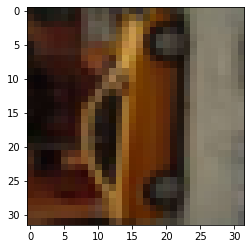

automobile


In [10]:
import numpy as np

label = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

data_size = len(loader.y)
for _i in range(1):
    k = np.random.randint(data_size)
    img_array = loader.x[k].numpy()
    img_array = np.uint8(img_array)
    print(img_array.shape) #img_array is 3 x 32 x 32
    img_array = np.rollaxis(img_array, 0, 3) #img array 0th to 2nd -> img_aray is now 32 x 32 x 3
    img_array = np.rollaxis(img_array, 1, 0)
    plt.imshow(img_array)
    plt.pause(1)
    print(label[loader.y[k]])
    

In [4]:
# training
batch_num = loader.get_batch_num()
cost_list = []
for epoch_idx in range(EPOCH_NUM):
    cumcost = 0.0
    for idx in range(batch_num):
        x, y = loader.get_batch()

        cumcost += model.train_step(x, y)
    cumcost /= batch_num
    print(cumcost)

    cost_list.append(cumcost)
    
print('Finished Training')


tensor(0.0986, grad_fn=<DivBackward0>)
Finished Training


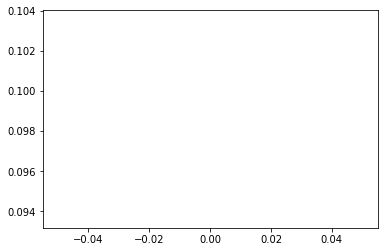

In [6]:
# cost_list plot
plt.plot(cost_list)
plt.show()

In [7]:
#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)

In [8]:
#net = Net()
#net.load_state_dict(torch.load(PATH))


In [14]:
correct = 0
it = 0
import torch
import pickle
with open('./dataset/test_batch', 'rb') as fo:
            test_batch = pickle.load(fo, encoding='latin1')

with torch.no_grad():
        x_list = test_batch['data']
        x_np = np.reshape(x_list,[-1,3,32,32])
        x = torch.from_numpy(x_np)
        x = x.float()
        
        y_list = test_batch['labels']
        y_np = np.asarray(y_list, dtype=np.int)
        y_torch = torch.from_numpy(y_np)    
        #y_onehot = torch.zeros(len(y_torch), y_torch.max()+1).scatter_(1, y_torch.unsqueeze(1), 1.)
        test_size = len(y_np)
        _, predicted = torch.max(model.inference(x), 1)
        
        print(predicted)
        print(y_torch)
        correct += (predicted == y_torch).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / test_size))


tensor([2, 9, 9,  ..., 9, 7, 1])
tensor([3, 8, 8,  ..., 5, 1, 7])
Accuracy of the network on the 10000 test images: 10 %


In [15]:
print(model.restore())

False


In [16]:
model.save()

IsADirectoryError: [Errno 21] Is a directory: './saved_parameters'

In [ ]:
print(model.restore())